In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import seaborn as sns
from sklearn.metrics import roc_curve

In [ ]:
!pip install -q --upgrade ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.7/797.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.13.2 which is incompatible.


In [ ]:
!pip install -q --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 3.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.23.1 which is incompatible.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.13.2 which is incompatible.


In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 66.6 MB/s eta 0:00:00


In [ ]:
pip install -U mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mne

Sampling Frequency of the data

In [ ]:
sf=256 #Hz

Data Procesing

In [ ]:
path="/content/drive/MyDrive/estimation and detection data/chb01"
fileList=os.listdir(path)
EEGdata=[]
for i in fileList:
  ext=os.path.splitext(i)
  if ext[1]==".edf":
    filePath=path+"/"+i
    fileData=mne.io.read_raw_edf(filePath)
    EEGdata.append(fileData)

Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-8-f83e5ad9ddcc>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb01/chb01_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb01/chb01_04.edf...
EDF file detected


<ipython-input-8-f83e5ad9ddcc>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb01/chb01_15.edf...
EDF file detected


<ipython-input-8-f83e5ad9ddcc>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb01/chb01_16.edf...
EDF file detected


<ipython-input-8-f83e5ad9ddcc>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb01/chb01_18.edf...
EDF file detected


<ipython-input-8-f83e5ad9ddcc>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb01/chb01_21.edf...
EDF file detected


<ipython-input-8-f83e5ad9ddcc>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...


<ipython-input-8-f83e5ad9ddcc>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


In [ ]:
sezeirs=[]
non_sezeirs=[]

In [ ]:
len(EEGdata)

7

Using matplotlib as 2D backend.


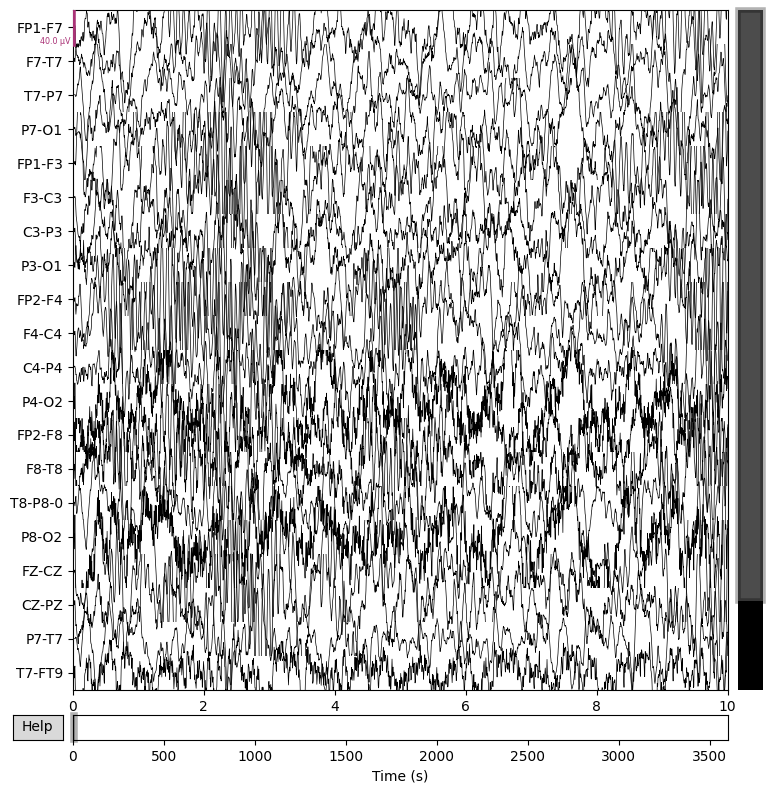

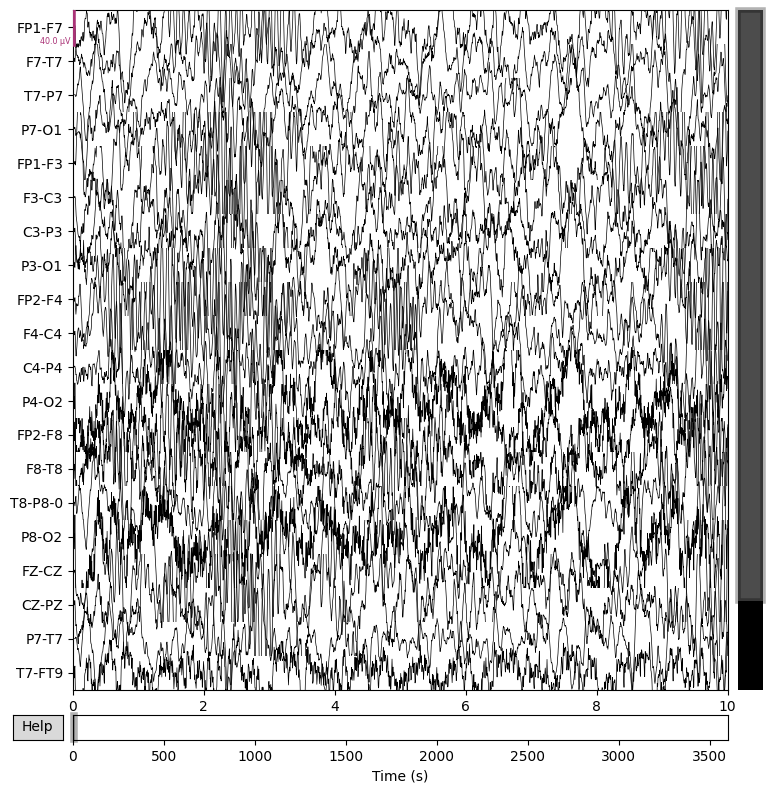

In [ ]:
EEGdata[0].plot()

In [ ]:
EEGdata[0].info["ch_names"]

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

In [ ]:
eeg=EEGdata[0]
start, stop = eeg.time_as_index([2996, 3036])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[1]
start, stop = eeg.time_as_index([1467, 1494])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[2]
start, stop = eeg.time_as_index([1732, 1772])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[3]
start, stop = eeg.time_as_index([1015, 1066])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[4]
start, stop = eeg.time_as_index([1720, 1810])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[5]
start, stop = eeg.time_as_index([327, 420])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[6]
start, stop = eeg.time_as_index([1862, 1963])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
path="/content/drive/MyDrive/estimation and detection data/chb02"
fileList=os.listdir(path)
EEGdata=[]
for i in fileList:
  ext=os.path.splitext(i)
  if ext[1]==".edf":
    filePath=path+"/"+i
    fileData=mne.io.read_raw_edf(filePath)
    EEGdata.append(fileData)

Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb02/chb02_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb02/chb02_19.edf...
EDF file detected


<ipython-input-20-4a86fa771d9c>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb02/chb02_16+.edf...
EDF file detected


<ipython-input-20-4a86fa771d9c>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...


<ipython-input-20-4a86fa771d9c>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


In [ ]:
eeg=EEGdata[0]
start, stop = eeg.time_as_index([130, 212])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[1]
start, stop = eeg.time_as_index([3369, 3378])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[2]
start, stop = eeg.time_as_index([2972, 3053])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
path="/content/drive/MyDrive/estimation and detection data/chb06"
fileList=os.listdir(path)
EEGdata=[]
for i in fileList:
  ext=os.path.splitext(i)
  if ext[1]==".edf":
    filePath=path+"/"+i
    fileData=mne.io.read_raw_edf(filePath)
    EEGdata.append(fileData)

Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb06/chb06_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb06/chb06_04.edf...
EDF file detected


<ipython-input-24-87077cc7f6ce>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb06/chb06_09.edf...
EDF file detected


<ipython-input-24-87077cc7f6ce>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb06/chb06_10.edf...
EDF file detected


<ipython-input-24-87077cc7f6ce>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb06/chb06_13.edf...
EDF file detected


<ipython-input-24-87077cc7f6ce>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb06/chb06_18.edf...
EDF file detected


<ipython-input-24-87077cc7f6ce>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/estimation and detection data/chb06/chb06_24.edf...
EDF file detected


<ipython-input-24-87077cc7f6ce>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


Setting channel info structure...
Creating raw.info structure...


<ipython-input-24-87077cc7f6ce>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  fileData=mne.io.read_raw_edf(filePath)


In [ ]:
eeg=EEGdata[0]
start, stop = eeg.time_as_index([1724, 1738])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

start, stop = eeg.time_as_index([7461, 7476])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)

start, stop = eeg.time_as_index([13525, 13540])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)

In [ ]:
eeg=EEGdata[1]
start, stop = eeg.time_as_index([327, 347])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

start, stop = eeg.time_as_index([6211, 6231])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)

In [ ]:
eeg=EEGdata[2]
start, stop = eeg.time_as_index([12500, 12516])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[3]
start, stop = eeg.time_as_index([10833, 10845])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[4]
start, stop = eeg.time_as_index([506, 519])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[5]
start, stop = eeg.time_as_index([7799, 7811])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
eeg=EEGdata[6]
start, stop = eeg.time_as_index([9387, 9403])
datas, times = eeg[:, start:stop]
diff=stop-start
datans1,timens1 = eeg[:,start-diff:start]
#datans2,timens2 = eeg[:,stop:]
sezeirs.append(datas)
non_sezeirs.append(datans1)
#non_sezeirs.append(datans2)

In [ ]:
def FT10Ref(eeg1):
  eeg0=eeg1.copy()#np.zeros(np.shape(eeg1))
  eeg0[22,:]=eeg1[22,:]-eeg1[21,:]-eeg1[14,:]
  eeg0[21,:]=eeg1[21,:]-eeg1[21,:]
  eeg0[20,:]=eeg1[20,:]
  eeg0[19,:]=eeg1[19,:]+eeg1[20,:]
  eeg0[18,:]=eeg1[18,:]+eeg1[19,:]+eeg1[20,:]
  eeg0[17,:]=eeg1[17,:]
  eeg0[16,:]=eeg1[16,:]
  eeg0[15,:]=-(eeg1[14,:]+eeg1[21,:])
  eeg0[14,:]=eeg1[22,:]-eeg1[21,:]-eeg1[14,:]
  eeg0[13,:]=eeg1[13,:]-eeg1[21,:]
  eeg0[12,:]=eeg1[12,:]+eeg1[13,:]-eeg1[21,:]
  eeg0[11,:]=eeg1[11,:]-eeg1[15,:]-(eeg1[14,:]+eeg1[21,:])
  eeg0[10,:]=eeg1[10,:]+eeg0[11,:]
  eeg0[9,:]=eeg1[9,:]+eeg0[10,:]
  eeg0[8,:]=eeg1[12,:]+eeg0[13,:]
  eeg0[7,:]=eeg1[7,:]-eeg1[3,:]+eeg0[18,:]
  eeg0[6,:]=eeg1[6,:]+eeg0[7,:]
  eeg0[5,:]=eeg1[5,:]+eeg0[6,:]
  eeg0[4,:]=eeg1[4,:]+eeg0[5,:]
  eeg0[3,:]=eeg1[18,:]+eeg1[19,:]+eeg1[20,:]
  eeg0[2,:]=eeg1[19,:]+eeg1[20,:]
  eeg0[1,:]=eeg1[1,:]+eeg0[2,:]
  eeg0[0,:]=eeg1[4,:]+eeg0[5,:]
  #eeg0=eeg0.reshape(-1)
  return eeg0

In [ ]:
eegSFT10Ref=[]
eegNSFT10Ref=[]

In [ ]:
for j in sezeirs:
  eegSFT10Ref.append(FT10Ref(j))

In [ ]:
for j in non_sezeirs:
  eegNSFT10Ref.append(FT10Ref(j))

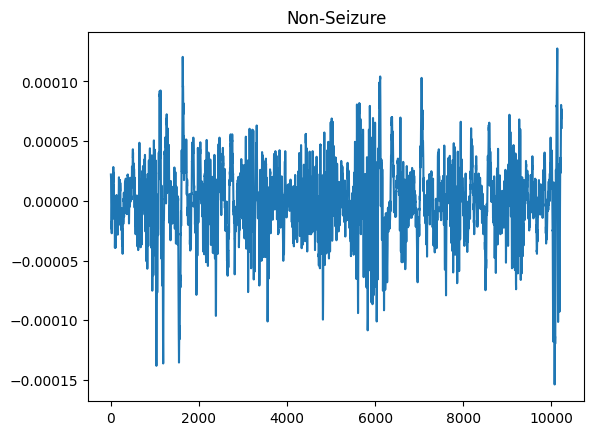

In [ ]:
plt.plot(non_sezeirs[0][0])
plt.title("Non-Seizure")
plt.show()

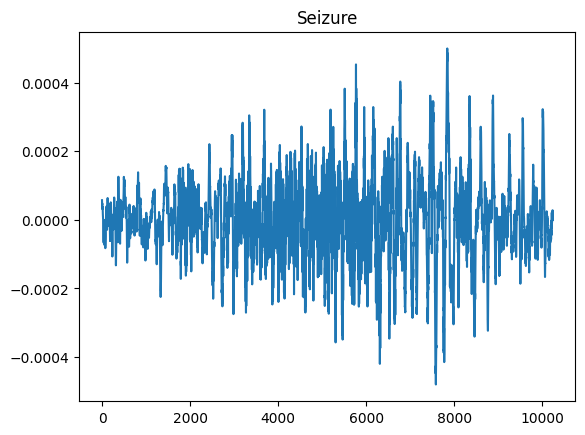

In [ ]:
plt.plot(sezeirs[0][0])
plt.title("Seizure")
plt.show()

In [ ]:
FT10NS=[]
for i in eegNSFT10Ref:
  FT10NS.append(i.reshape(-1))

In [ ]:
d=FT10NS[0]
for i in range(len(FT10NS)-1):
  d=np.concatenate((d,FT10NS[i+1]))
FT10NS=d

In [ ]:
FT10S=[]
for i in eegSFT10Ref:
  FT10S.append(i.reshape(-1))

In [ ]:
d=FT10S[0]
for i in range(len(FT10S)-1):
  d=np.concatenate((d,FT10S[i+1]))
FT10S=d

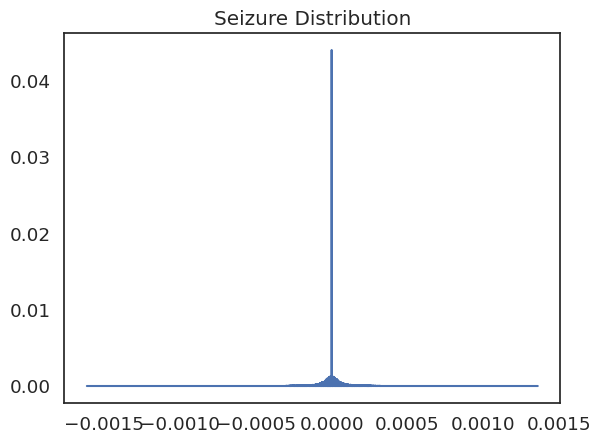

In [ ]:
Sdata1,conts1=np.unique(FT10S,return_counts=True)
s1=sum(conts1)
conts1=conts1/s1
plt.plot(Sdata1,conts1)
# plt.xlabel("Seizure")
# plt.ylabel("Probability")
plt.title("Seizure Distribution")
plt.show()

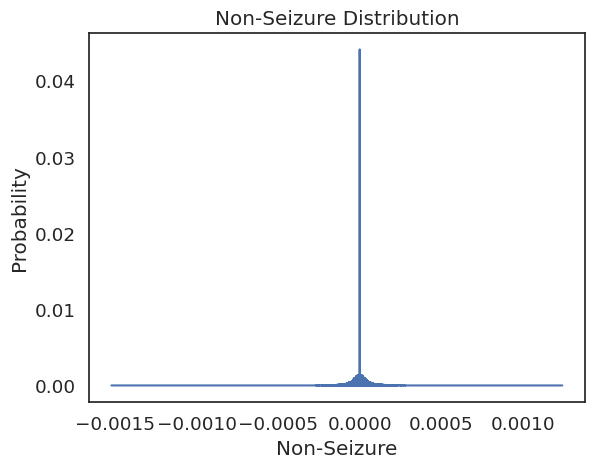

In [ ]:
NSdata1,contns2=np.unique(FT10NS,return_counts=True)
ns1=sum(contns2)
contns2=contns2/ns1
plt.plot(NSdata1,contns2)
plt.xlabel("Non-Seizure")
plt.ylabel("Probability")
plt.title("Non-Seizure Distribution")
plt.show()

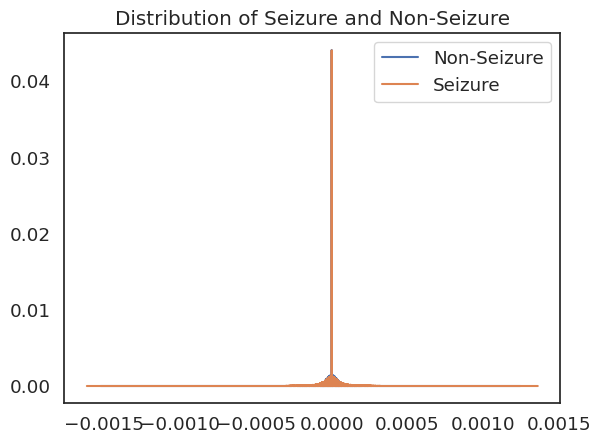

In [ ]:
#plt.plot(Sdata,conts, label="Seizure")
plt.plot(NSdata1,contns2, label="Non-Seizure")
plt.plot(Sdata1,conts1, label="Seizure")
plt.title("Distribution of Seizure and Non-Seizure")
plt.legend()
plt.show()

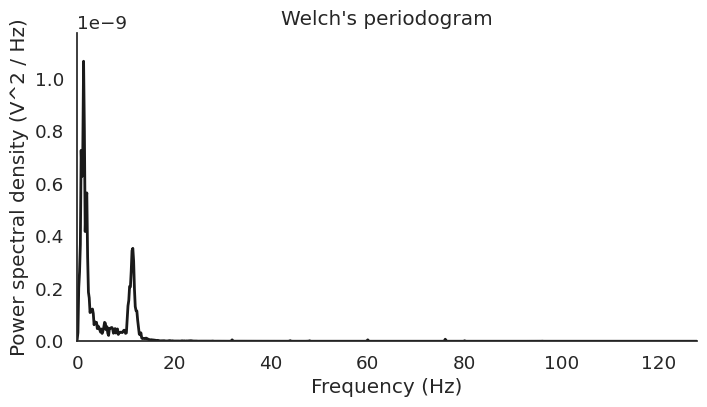

In [ ]:
win = 6* sf
freqs, psd1 = signal.welch(eegNSFT10Ref[0][0,:], sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd1, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd1.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()
plt.show()

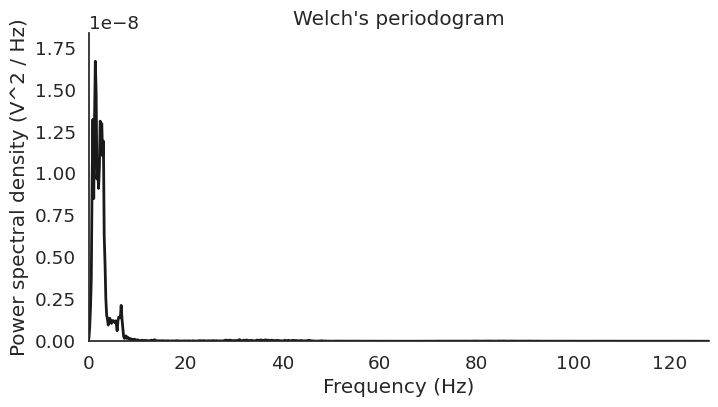

In [ ]:
win = 6* sf
freqs, psd2 = signal.welch(eegSFT10Ref[0][0,:], sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd2, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd2.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()
plt.show()

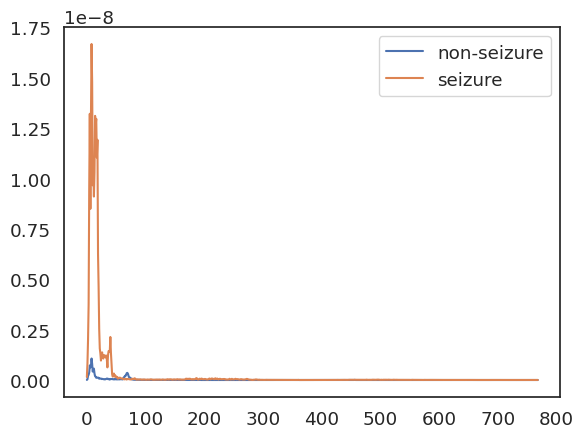

In [ ]:
plt.plot(psd1,label="non-seizure")
plt.plot(psd2,label="seizure")
plt.legend()
plt.show()

In [ ]:
PSDnsFT10=[]
PSDsFT10=[]
FreqnsFT10=[]
FreqsFT10=[]

In [ ]:
win = 6* sf
for i in range(len(eegNSFT10Ref)):
  PSD=[]
  F=[]
  for j in range(len(eegNSFT10Ref[i])):
    freq, psd = signal.welch(eegNSFT10Ref[i][j,:], sf, nperseg=win)
    PSD.append(psd)
    F.append(freqs)
  PSD=np.array(PSD)
  F=np.array(F)
  PSDnsFT10.append(PSD)
  FreqnsFT10.append(F)

In [ ]:
win = 6* sf
for i in range(len(eegSFT10Ref)):
  PSD=[]
  F=[]
  for j in range(len(eegSFT10Ref[i])):
    freq, psd = signal.welch(eegSFT10Ref[i][j,:], sf, nperseg=win)
    PSD.append(psd)
    F.append(freqs)
  PSD=np.array(PSD)
  F=np.array(F)
  PSDsFT10.append(PSD)
  FreqsFT10.append(F)

In [ ]:
PSDsFT10=np.array(PSDsFT10)
means=np.mean(PSDsFT10,axis=0)
means=np.mean(means,axis=1)

In [ ]:
PSDnsFT10=np.array(PSDnsFT10)
meanns=np.mean(PSDnsFT10,axis=0)
meanns=np.mean(meanns,axis=1)

In [ ]:
meann=np.mean((means,meanns),axis=0)

In [ ]:
Train=[]
Test=[]
Label=[]

In [ ]:
l=int(len(PSDsFT10)*0.8)
for i in range(len(PSDsFT10)):
  if i<l:
    Train.append(PSDsFT10[i])
  else:
    Test.append(PSDsFT10[i])
  Label.append(0)

In [ ]:
l=int(len(PSDnsFT10)*0.8)
for i in range(len(PSDnsFT10)):
  if i<l:
    Train.append(PSDnsFT10[i])
  else:
    Test.append(PSDnsFT10[i])
  Label.append(1)

In [ ]:
m=np.mean(meann)
m

5.8131242588313783e-11

In [ ]:
pred=[]
for i in Train:
  if np.mean(i)<m:
    pred.append(0)
  else:
    pred.append(1)
for i in Test:
  if np.mean(i)<m:
    pred.append(0)
  else:
    pred.append(1)

In [ ]:
k=0
Label=np.array(Label)
pred=np.array(pred)
for i in range(len(Label)):
  if Label[i]==pred[i]:
    k+=1
acc=k/len(Label)
acc

0.675

In [ ]:
fpr,tpr,th=roc_curve(Label, pred)#, *, pos_label=None, sample_weight=None, drop_intermediate=True)[source]

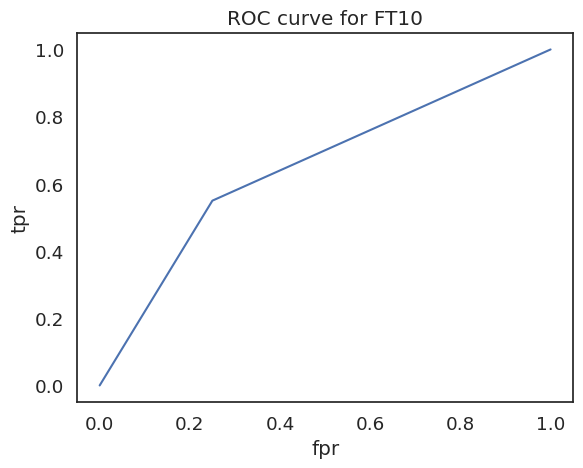

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve for FT10")
plt.show()

In [ ]:
def FT9Ref(a):
  arr=a.copy()
  for i in range(a.shape[0]):
    if i==0:
      arr[0,:]=a[0,:]+a[1,:]+a[19,:]
    if i==1:
      arr[1:]=a[1,:]+a[19,:]
    if i==2:
      arr[2,:]=a[19,:]
    if i==3:
      arr[3,:]=a[18,:]+a[19,:]
    if i==4:
      arr[4,:]=a[0,:]+a[1,:]+a[19,:]
    if i==5:
      arr[5,:]=a[5,:]+a[7,:]-a[3,:]+a[18,:]+a[19,:]+a[6,:]
    if i==6:
      arr[6,:]=a[7,:]-a[3,:]+a[18,:]+a[19,:]+a[6,:]
    if i==7:
      arr[7,:]=a[7,:]-a[3,:]+a[18,:]+a[19,:]
    if i==8:
      arr[8,:]=a[12,:]+a[13,:]-a[21,:]-a[20,:]
    if i==9:
      arr[9,:]=a[9,:]+a[10,:]+a[11,:]-a[15,:]-a[22,:]-a[21,:]-a[20,:]
    if i==10:
      arr[10,:]=a[10,:]+a[11,:]-a[15,:]-a[22,:]-a[21,:]-a[20,:]
    if i==11:
      arr[11,:]=a[11,:]-a[15,:]-a[22,:]-a[21,:]-a[20,:]
    if i==12:
      arr[12,:]=a[12,:]+a[13,:]-a[21,:]-a[20,:]
    if i==13:
      arr[13,:]=a[13,:]-a[21,:]-a[20,:]
    if i==14:
      arr[14,:]=-a[21,:]-a[20,:]
    if i==15:
      arr[15,:]=-a[21,:]-a[20,:]-a[22,:]
    if i==20:
      arr[20,:]=a[20,:]-a[20,:]
    if i==21:
      arr[21,:]=-a[20,:]
    if i==22:
      arr[22,:]=-a[21,:]-a[20,:]
  return(arr)

In [ ]:
eegSFT9Ref=[]
eegNSFT9Ref=[]

In [ ]:
for j in sezeirs:
  eegSFT9Ref.append(FT9Ref(j))

In [ ]:
FT9S=[]
for i in eegNSFT9Ref:
  FT9S.append(i.reshape(-1))

In [ ]:
for j in non_sezeirs:
  eegNSFT9Ref.append(FT9Ref(j))

In [ ]:
FT9NS=[]
for i in eegNSFT9Ref:
  FT9NS.append(i.reshape(-1))

In [ ]:
d=FT9S[0]
for i in range(len(FT9S)-1):
  d=np.concatenate((d,FT9S[i+1]))
FT9S=d

In [ ]:
d=FT9NS[0]
for i in range(len(FT9NS)-1):
  d=np.concatenate((d,FT9NS[i+1]))
FT9NS=d

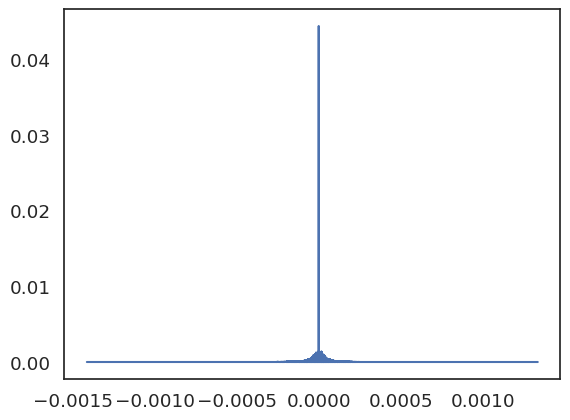

In [ ]:
Sdata2,conts3=np.unique(FT9S,return_counts=True)
s2=sum(conts3)
conts3=conts3/s2
plt.plot(Sdata2,conts3)
plt.show()

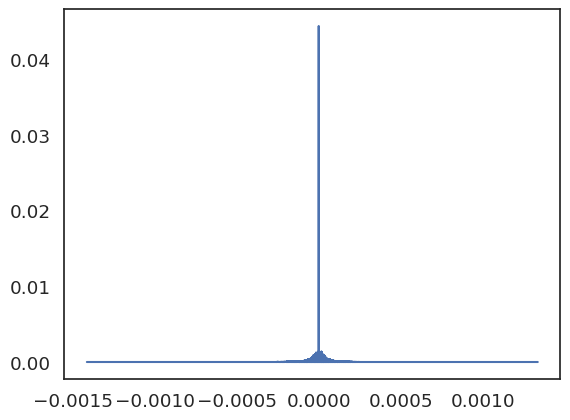

In [ ]:
NSdata2,contns4=np.unique(FT9NS,return_counts=True)
ns2=sum(contns4)
contns4=contns4/ns2
plt.plot(NSdata2,contns4)
plt.show()

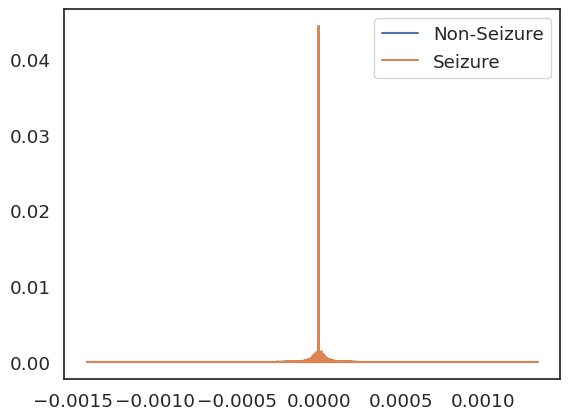

In [ ]:
#plt.plot(Sdata,conts, label="Seizure")
plt.plot(NSdata2,contns4, label="Non-Seizure")
plt.plot(Sdata2,conts3, label="Seizure")
plt.legend()
plt.show()

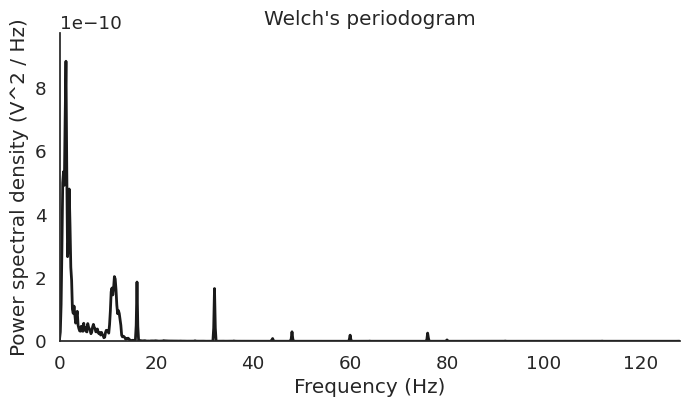

In [ ]:
win = 6* sf
freqs, psd1 = signal.welch(eegNSFT9Ref[0][0,:], sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd1, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd1.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()
plt.show()

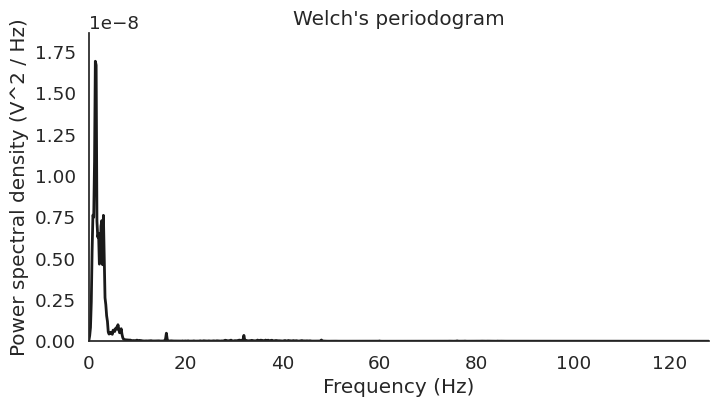

In [ ]:
win = 6* sf
freqs, psd2 = signal.welch(eegSFT9Ref[0][0,:], sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd2, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd2.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()
plt.show()

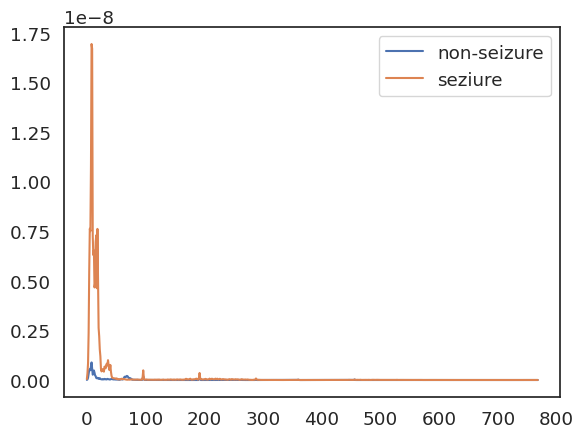

In [ ]:
plt.plot(psd1,label="non-seizure")
plt.plot(psd2,label="seziure")
plt.legend()
plt.show()

In [ ]:
PSDnsFT9=[]
PSDsFT9=[]
FreqnsFT9=[]
FreqsFT9=[]

In [ ]:
win = 6* sf
for i in range(len(eegNSFT9Ref)):
  PSD=[]
  F=[]
  for j in range(len(eegNSFT9Ref[i])):
    freq, psd = signal.welch(eegNSFT9Ref[i][j,:], sf, nperseg=win)
    PSD.append(psd)
    F.append(freqs)
  PSD=np.array(PSD)
  F=np.array(F)
  PSDnsFT9.append(PSD)
  FreqnsFT9.append(F)

In [ ]:
win = 6* sf
for i in range(len(eegSFT9Ref)):
  PSD=[]
  F=[]
  for j in range(len(eegSFT9Ref[i])):
    freq, psd = signal.welch(eegSFT9Ref[i][j,:], sf, nperseg=win)
    PSD.append(psd)
    F.append(freqs)
  PSD=np.array(PSD)
  F=np.array(F)
  PSDsFT9.append(PSD)
  FreqsFT9.append(F)

In [ ]:
PSDsFT9=np.array(PSDsFT9)
means=np.mean(PSDsFT9,axis=0)
means=np.mean(means,axis=1)

In [ ]:
PSDnsFT9=np.array(PSDnsFT9)
meanns=np.mean(PSDnsFT9,axis=0)
meanns=np.mean(meanns,axis=1)

In [ ]:
meann=np.mean((means,meanns),axis=0)

In [ ]:
Train=[]
Test=[]
Label=[]

In [ ]:
l=int(len(PSDsFT9)*0.8)
for i in range(len(PSDsFT9)):
  if i<l:
    Train.append(PSDsFT9[i])
  else:
    Test.append(PSDsFT9[i])
  Label.append(0)

In [ ]:
l=int(len(PSDnsFT9)*0.8)
for i in range(len(PSDnsFT9)):
  if i<l:
    Train.append(PSDnsFT9[i])
  else:
    Test.append(PSDnsFT9[i])
  Label.append(1)

In [ ]:
m=np.mean(meann)
m

5.2023032607707195e-11

In [ ]:
pred=[]
for i in Train:
  if np.mean(i)<m:
    pred.append(0)
  else:
    pred.append(1)
for i in Test:
  if np.mean(i)<m:
    pred.append(0)
  else:
    pred.append(1)

In [ ]:
k=0
Label=np.array(Label)
pred=np.array(pred)
for i in range(len(Label)):
  if Label[i]==pred[i]:
    k+=1
acc=k/len(Label)
acc

0.675

In [ ]:
fpr,tpr,th=roc_curve(Label, pred)#, *, pos_label=None, sample_weight=None, drop_intermediate=True)[source]

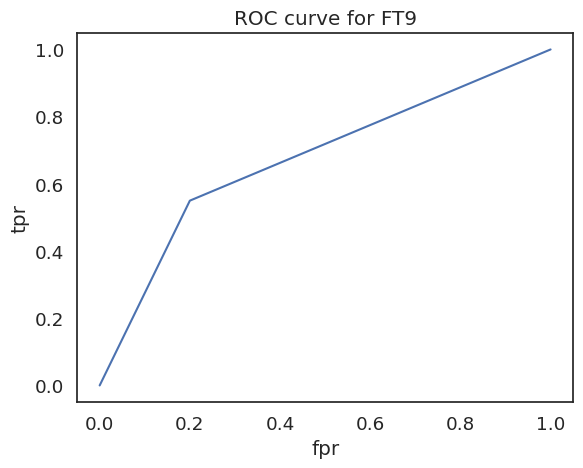

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve for FT9")
plt.show()